## Import packages:

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import matplotlib.ticker as mtick
from pandas.api.types import CategoricalDtype

### Define Variables and Functions:

In [65]:
idx = pd.IndexSlice

def ColumnsToUse(cols, x_cols):
    return [col for col in cols if col not in x_cols]

def AirlineDataframe(airline, df):
    df = df[df.Airline == airline].drop(columns=['Airline'])
    return df

def AirlineWeeklyDestinations(airline, df):
    df_airline = df[df.Airline == airline]
    airline_weekly_destinations = df_airline.groupby(['Destination', 'Week'])['Confirmed'].count()
    return airline_weekly_destinations.unstack()

def AirlineWeekdaysDestinations(airline, df):
    df_airline = df[df.Airline == airline]
    airline_weekly_destinations = df_airline.groupby(['Destination', 'WeekDay'])['Confirmed'].count()
    return airline_weekly_destinations.unstack()


### Read datasets:

In [172]:
df_orig = pd.read_pickle(os.path.join("FlightData", "flight_departures.pickle"))
df_orig = df_orig[df_orig.Airline.notnull()]
df_actual = df_orig[df_orig.Scenario == "Actual"]
df_plan = df_orig[df_orig.Scenario == "Plan"]

minDate = max(min(df_orig[df_orig.Scenario == 'Actual'].Date), min(df_orig[df_orig.Scenario == 'Plan'].Date))
maxDate = min(max(df_orig[df_orig.Scenario == 'Actual'].Date), max(df_orig[df_orig.Scenario == 'Plan'].Date))

df_a = df_actual[(df_actual.Date >= minDate) & (df_actual.Date <= maxDate)].reset_index(drop=True)
df_p = df_plan[(df_plan.Date >= minDate) & (df_plan.Date <= maxDate)].reset_index(drop=True)
df_p = df_p.drop(columns=['Scenario', 'Confirmed'])
df = pd.merge(df_p, df_a[['Date', 'FlightNumber', 'Confirmed']], on=['Date', 'FlightNumber'], how="left").fillna('')
df['Confirmed'] = df['Confirmed'].apply(lambda x: x != '')

df = df.drop(columns=['CreationDate', 'Scheduled', 'pMins'])
confirmed = df[df.Confirmed].drop(columns=['Confirmed'])
cancelled = df[df.Confirmed == False].drop(columns=['Confirmed'])

current_week = df_a.Date.max().week
current_week

40

## Busiest Airlines:

<AxesSubplot:xlabel='Airline'>

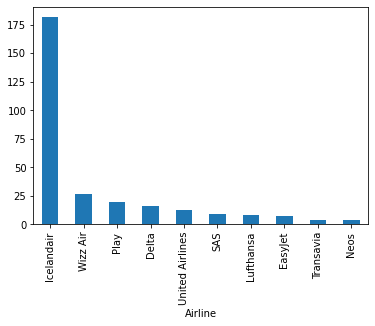

In [157]:
df_p = df_p.assign(Week = df_p.Date.dt.strftime('%Y-%W'))
busiest_weekly_flights = df_p.groupby(['Airline', 'Week']).pMins.count().groupby(level=0).mean().round(1).nlargest(n=10)
# weekly_flights_result = weekly_flights.apply(lambda x: x.sum())
# busiest_weekly_flights.plot.bar()
busiest_airlines = busiest_weekly_flights.index
busiest_airlines
busiest_weekly_flights.plot.bar()

## Confirmation-ratio for all Airlines:

(0.0, 105.0)

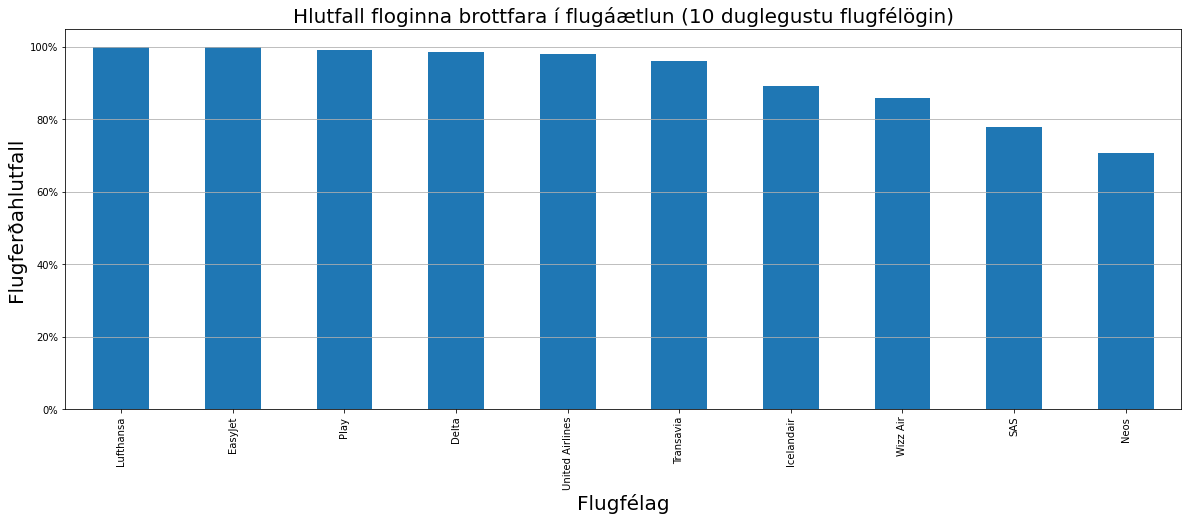

In [156]:
df = df[df.Airline.isin(busiest_airlines)]

result = df.groupby(['Airline'])['Confirmed'].apply(lambda x: (100 * x[x].count() / x.count())).sort_values(ascending=False)

ax = result.plot.bar(figsize=(20, 7))
ax.set_title(f'Hlutfall floginna brottfara í flugáætlun (10 duglegustu flugfélögin)', fontsize=20)  # or size, alternatively
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(axis='y')
ax.set_xlabel("Flugfélag" ,fontsize=20)
ax.set_ylabel("Flugferðahlutfall" ,fontsize=20)
ax.set_ylim(0, 105)

## Cancelled flights per Week for certain Airline:

Text(0, 0.5, 'Flugferðir')

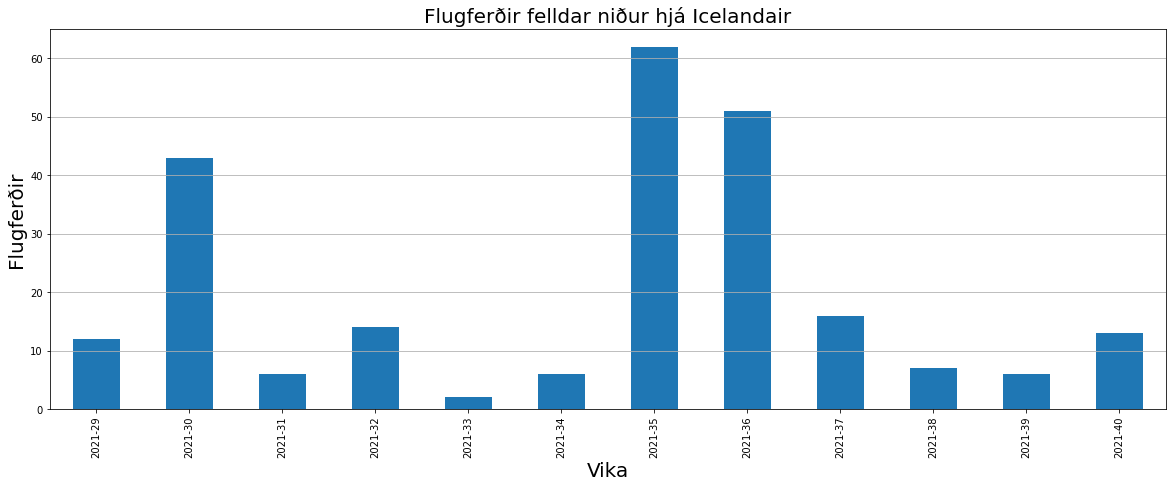

In [171]:
airline = 'Icelandair'
cancelled_airline = cancelled[cancelled.Airline == airline].drop(columns=['Airline'])
cancelled_airline = cancelled_airline.assign(Week = df_p.Date.dt.strftime('%Y-%W'))
cancelled_airline_result = cancelled_airline.groupby(['Week'])['Date'].count()

ax = cancelled_airline_result.plot.bar(figsize=(20, 7))
ax.set_title(f'Flugferðir felldar niður hjá {airline}', fontsize=20)  # or size, alternatively
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(axis='y')
ax.set_xlabel("Vika" ,fontsize=20)
ax.set_ylabel("Flugferðir" ,fontsize=20)
# ax.set_ylim(0, 105)

## Cancelled flights for an Airline in certain Week:

In [303]:
airline = 'Icelandair'
week = currentWeek
cancelled_airline = cancelled[cancelled.Airline == airline].drop(columns=['Airline'])
cancelled_airline = cancelled_airline.assign(Week = df_p.Date.dt.strftime('%Y-%W'))
cancelled_airline_result = cancelled_airline.groupby(['Week'])['Date'].count()

ax = cancelled_airline_result.plot.bar(figsize=(20, 7))
ax.set_title(f'Flugferðir felldar niður hjá {airline}', fontsize=20)  # or size, alternatively
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(axis='y')
ax.set_xlabel("Vika" ,fontsize=20)
ax.set_ylabel("Flugferðir" ,fontsize=20)
# ax.set_ylim(0, 105)

array(['Icelandair', 'Atlantic Airways', 'Wizz Air', 'British Airways',
       'SAS', 'United Airlines', 'Air Greenland', 'Neos', 'Eurowings',
       'Czech Airlines', 'Arkia - Israeli Airlines Ltd', 'Vueling',
       'Transavia', 'Play', 'Delta'], dtype=object)

In [304]:
airline_can_week_count = airline_cancel.groupby(['Destination', 'Week'])['Confirmed'].count()
airline_can_week_count.unstack()

Week,29,30,31,32,33,34,35,36,37,38
Destination,,,,,,,,,,
Alicante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Amsterdam,3.0,5.0,NaN,4.0,NaN,1.0,3.0,4.0,8.0,9.0
Bergen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
Berlin Brandenburg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Bilbao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
Boston,1.0,7.0,2.0,1.0,NaN,NaN,NaN,1.0,2.0,2.0
Brussel,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,3.0
Chania,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0
Chicago,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,5.0,5.0


## Confirmations for Airline:

In [306]:
airline_confirmed = AirlineDataframe('Icelandair', confirmed)
confirmed.Airline.unique()

array(['Lufthansa', 'Icelandair', 'Neos', 'Delta', 'Play',
       'British Airways', 'United Airlines', 'Wizz Air', 'Edelweiss',
       'Vueling', 'Transavia', 'Czech Airlines', 'Iberia Express',
       'EasyJet', 'SAS', 'Norwegian', 'Eurowings', 'Air Baltic',
       'El Al Israel Airlines Ltd.', 'Austrian',
       'Enter Air Spolka z.o.o.', 'Ryanair Ltd.', 'Atlantic Airways',
       'Arkia - Israeli Airlines Ltd', nan, 'JET2.Com',
       'Croatia Airlines'], dtype=object)

In [352]:
# airline_con_week_count = airline_confirmed.groupby(['Destination', 'Week'])['Confirmed'].count()
# airline_con_week_count.unstack()
AirlineWeekdaysDestinations('Play', cancelled)


WeekDay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Destination,,,,,,,
Alicante,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Berlin Brandenburg,1.0,1.0,NaN,NaN,NaN,1.0,1.0
Kaupmannahöfn,NaN,NaN,NaN,1.0,NaN,NaN,NaN
London Stansted,1.0,1.0,1.0,NaN,1.0,NaN,NaN
París CDG,1.0,1.0,1.0,NaN,NaN,NaN,1.0
Tenerife South,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Is Play succeeding Icelandair somewhere?

## Icelandair cancellations for Play destinations:

In [309]:
iceair_cancel = airline_cancel_week_count.unstack()
# iceair_cancel = iceair_cancel[iceair_can.index.isin(dest_play)]
iceair_cancel

NameError: name 'airline_cancel_week_count' is not defined

## Play confirmations:

In [295]:
play_con = airline_con_week_count.unstack()
play_con = play_con[play_con.index.isin(dest_play)]
play_con

Week,29,30,31,32,33,34,35,36,37,38
Destination,,,,,,,,,,
Alicante,NaN,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0
Barcelona,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
Berlin Brandenburg,2.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
Kaupmannahöfn,1.0,6.0,20.0,18.0,21.0,19.0,16.0,16.0,15.0,15.0
París CDG,4.0,14.0,15.0,14.0,14.0,15.0,14.0,12.0,11.0,12.0
Tenerife South,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0


## Conclusion:
It looks like Play is 